# Visualize Thermo Profile Experiments
Starting by uploading necessary  *library*

In [50]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import FileLink, FileLinks

## Setting up some default variable

In [3]:

#this is the folder containig the data
data_path = 'data'

#this is the output of the r package
result_file = 'results.txt'

#this is the column with the protein ids
index_col = 'Protein_ID'

#this is the name of the configuration file
conf_file = 'TPP_config.txt'

#define the fitting function
def sigmoid(p,x):
    a,b,plateau = p[0],p[1],p[2]
    y = ( (1-plateau)/(1+np.exp(-(a/x-b)) ))+plateau
    return y

## Always good to have a look at the raw data

In [4]:
#load and visualise the data
df_data = pd.read_csv(os.path.join(data_path,result_file),sep='\t')
df_data.set_index(index_col,inplace=True)
df_data.head()

,norm_rel_fc_131L_Control_1.x,norm_rel_fc_130H_Control_1.x,norm_rel_fc_130L_Control_1.x,norm_rel_fc_129H_Control_1.x,norm_rel_fc_129L_Control_1.x,norm_rel_fc_128H_Control_1.x,norm_rel_fc_128L_Control_1.x,norm_rel_fc_127H_Control_1.x,norm_rel_fc_127L_Control_1.x,norm_rel_fc_126_Control_1.x,...,p_NPARC,p_adj_NPARC,qssm_Control_1.y,qupm_Control_1.y,qssm_Control_2.y,qupm_Control_2.y,qssm_Drug_1.y,qupm_Drug_1.y,qssm_Drug_2.y,qupm_Drug_2.y
Protein_ID,,,,,,,,,,,,,,,,,,,,,
sp|E9BDA8,0.990937,0.973234,0.820097,0.599993,0.394934,0.287005,0.211521,0.161547,0.124470,0.104878,...,0.074015,0.203586,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
tr|A0A0R4,0.990937,0.752734,0.562927,0.472908,0.397951,0.272372,0.139648,0.140982,0.158876,0.162520,...,0.791572,0.956749,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
tr|E9B766,0.990937,0.939822,0.900351,0.764787,0.619531,0.527251,0.361408,0.308056,0.210818,0.170890,...,0.998438,0.999971,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
tr|E9B767,0.990937,0.940680,0.806586,0.450044,0.340698,0.247605,0.208551,0.192894,0.154730,0.144998,...,0.812224,0.967479,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
tr|E9B769,0.990937,0.996430,0.891935,0.820158,0.656923,0.495891,0.449529,0.312882,0.145308,0.107078,...,0.046564,0.145784,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0


## And make some prelimary sanity check by visualizing the data
These plots show that the two drug replica and two control replica have good correlation

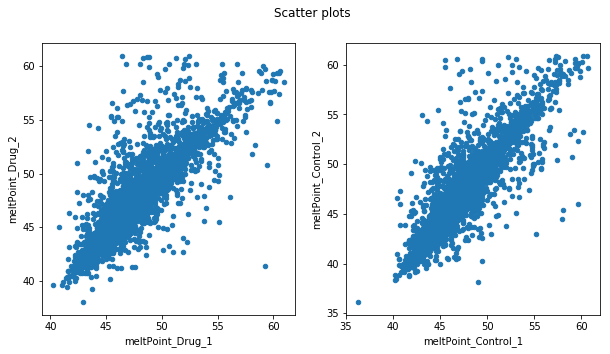

In [5]:
fig,axes = plt.subplots(ncols=2,nrows=1,figsize=(10,5))
df_data.plot(kind='scatter',x='meltPoint_Drug_1',y='meltPoint_Drug_2',ax=axes[0])
df_data.plot(kind='scatter',x='meltPoint_Control_1',y='meltPoint_Control_2',ax=axes[1])
plt.suptitle('Scatter plots')
plt.show()

Can i get more details on the drug replicates?

/Users/mtinti/miniconda3/envs/visualize_ttp/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


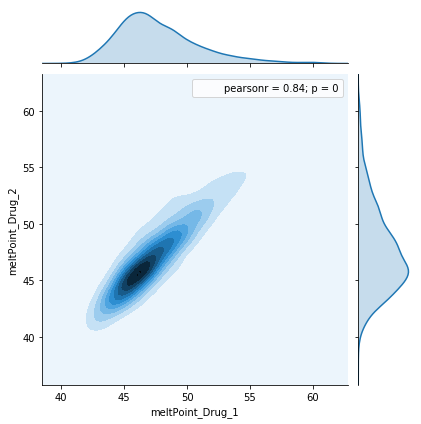

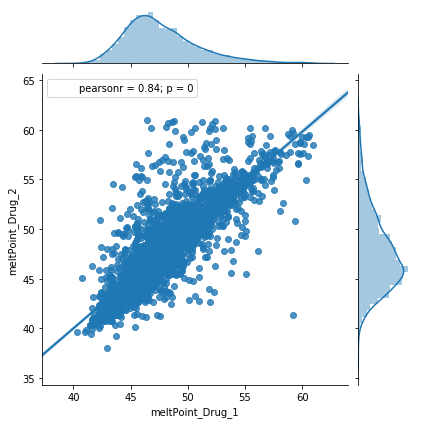

In [6]:
#fig,axes = plt.subplots(ncols=2,nrows=1,figsize=(10,5))
sns.jointplot(x="meltPoint_Drug_1", 
              y="meltPoint_Drug_2", 
              data=df_data[['meltPoint_Drug_1','meltPoint_Drug_2']], 
              kind="kde")

sns.jointplot(x="meltPoint_Drug_1", 
              y="meltPoint_Drug_2", 
              data=df_data[['meltPoint_Drug_1','meltPoint_Drug_2']], 
              kind="reg")

#plt.show()

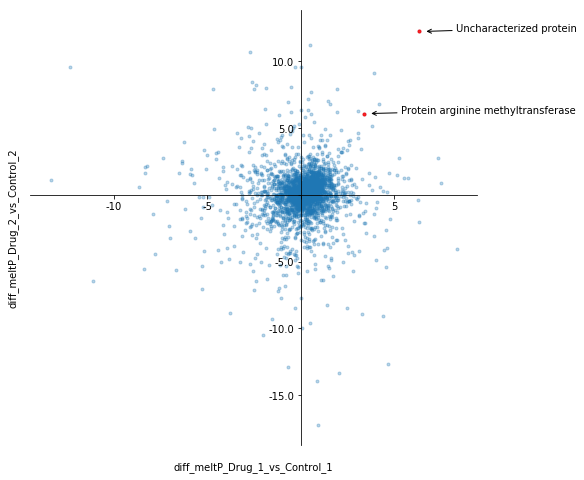

/Users/mtinti/Desktop/git_projects/visualize_ttp/scatter.svg

In [51]:
#df_data['T_diff_1']=np.log1p(df_data["diff_meltP_Drug_1_vs_Control_1"])
#df_data['T_diff_2']=np.log1p(df_data["diff_meltP_Drug_2_vs_Control_2"])


fig, ax = plt.subplots(figsize=(8,8))
sns.regplot(
    x="diff_meltP_Drug_1_vs_Control_1",#x='T_diff_1',# 
    y="diff_meltP_Drug_2_vs_Control_2",#y='T_diff_2',# 
    data=df_data,
    fit_reg=False,
    marker='.',
    ax=ax,
    scatter_kws={'alpha':0.3}
            ) 

sns.regplot(
    x="diff_meltP_Drug_1_vs_Control_1",#x='T_diff_1',# 
    y="diff_meltP_Drug_2_vs_Control_2",#y='T_diff_2',# 
    data=df_data.loc[['tr|E9BFY4','tr|E9BCX4']],
    fit_reg=False,
    marker='.',
    ax=ax,
    color='Red',
    
            ) 



ax.spines['left'].set_position(('data',0.0))
ax.spines['bottom'].set_position(('data',0.0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.labelpad=250
ax.yaxis.labelpad=250
#ax.set_xticklabels(['-10','-5','','5'])
#print([n for n in ax.get_xticklabels()])
def add_label(protein='tr|E9BP90',
              text_to_use='my prot'):
    temp = df_data.loc[protein]
    x=temp["diff_meltP_Drug_1_vs_Control_1"]
    y=temp["diff_meltP_Drug_2_vs_Control_2"]
    #print (x,y)
    plt.annotate(
    text_to_use,
    xy=(x+0.3,y),
    xytext=(x+2,y),
    arrowprops=dict(arrowstyle='->')    
)
    
    
add_label(protein='tr|E9BFY4',
         text_to_use='Protein arginine methyltransferase')
add_label(protein='tr|E9BCX4',
          text_to_use='Uncharacterized protein')


a=list(ax.get_yticks())
#print (a)

ax.set_xticklabels(['-15','-10','-5',' ','5','10'])
ax.set_yticklabels([-20.0, -15.0, -10.0, -5.0, ' ', 5.0, 10.0, 15.0])
plt.savefig('scatter.png')
plt.savefig('scatter.svg')

plt.show()

#diff_meltP_Drug_1_vs_Control_1,diff_meltP_Drug_2_vs_Control_2.set_color('none')
FileLink('scatter.png')
FileLink('scatter.svg')

/Users/mtinti/miniconda3/envs/visualize_ttp/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


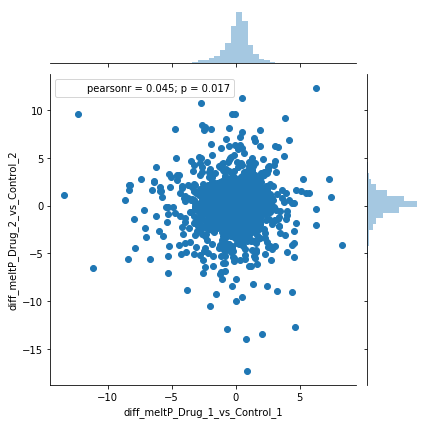

In [44]:
sns.jointplot(x="diff_meltP_Drug_1_vs_Control_1", 
              y="diff_meltP_Drug_2_vs_Control_2", 
              data=df_data)
              #kind="reg")

plt.show()
#diff_meltP_Drug_1_vs_Control_1,diff_meltP_Drug_2_vs_Control_2

In [53]:
#setting some variables to facilitate the plotting
df_conf = pd.read_table(os.path.join(data_path,conf_file),
                 sep=' ')

labels = list(df_conf.columns[-10:].values)
labels = [n for n in labels][::-1] 
temperatures = list(df_conf.iloc[0,-10:].values)
temperatures = [float(n) for n in temperatures][::-1]
temperatures_fit = np.arange(min(temperatures)-1,max(temperatures)+1,0.1)
label_to_temperature = dict(zip(labels,temperatures))
df_conf.head()



,Experiment,Condition,ComparisonVT1,ComparisonVT2,126,127L,127H,128L,128H,129L,129H,130L,130H,131L
1,Control_1,Vehicle,x,NaN,61.0,58.0,55.0,52.0,49.0,46.0,43.0,40.0,37.0,34.0
2,Control_2,Vehicle,NaN,x,61.0,58.0,55.0,52.0,49.0,46.0,43.0,40.0,37.0,34.0
3,Drug_1,Treatment,x,NaN,61.0,58.0,55.0,52.0,49.0,46.0,43.0,40.0,37.0,34.0
4,Drug_2,Treatment,NaN,x,61.0,58.0,55.0,52.0,49.0,46.0,43.0,40.0,37.0,34.0


In [54]:
#setting the names for the experiments
control_1 = ['norm_rel_fc_'+(n)+'_Control_1.x' for n in labels]
control_2 = ['norm_rel_fc_'+(n)+'_Control_2.x' for n in labels]
drug_1 = ['norm_rel_fc_'+(n)+'_Drug_1.x' for n in labels]
drug_2 = ['norm_rel_fc_'+(n)+'_Drug_2.x' for n in labels]

params = ['a_','b_','plateau_','meltPoint_','inflPoint_','slope_','R_sq_']
params_control_1 = [n+'Control_1' for n in params]
params_control_2 = [n+'Control_2' for n in params]
params_drug_1 = [n+'Drug_1' for n in params]
params_drug_2 = [n+'Drug_2' for n in params]


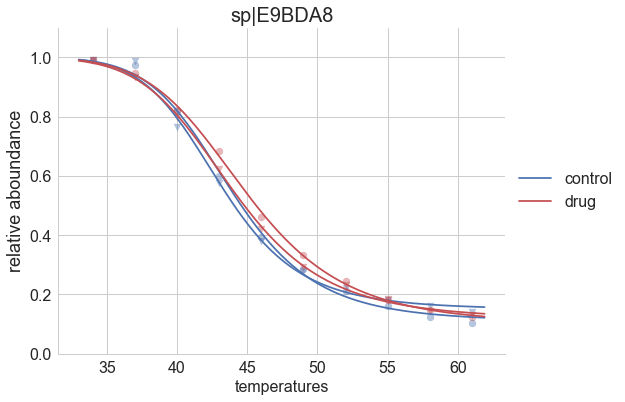

In [55]:
sns.set(style="whitegrid", color_codes=True)
fig,ax = plt.subplots(figsize=(8,6))
prot = 'sp|E9BDA8'
ax.scatter(
        temperatures,
        df_data.loc[prot][control_1].values,c='b',marker='o', alpha=0.4)
ax.plot(
        temperatures_fit,
        sigmoid(df_data.loc[prot][params_control_1],temperatures_fit),c='b')

ax.scatter(
        temperatures,
        df_data.loc[prot][control_2].values,c='b',marker='v', alpha=0.4)

ax.plot(
        temperatures_fit,
        sigmoid(df_data.loc[prot][params_control_2],temperatures_fit),c='b',label='control')

ax.scatter(
        temperatures,
        df_data.loc[prot][drug_1].values,c='r',marker='o', alpha=0.4)

ax.plot(
        temperatures_fit,
        sigmoid(df_data.loc[prot][params_drug_1],temperatures_fit),c='r')

ax.scatter(
        temperatures,
        df_data.loc[prot][drug_2].values,c='r',marker='v', alpha=0.4)

ax.plot(
        temperatures_fit,
        sigmoid(df_data.loc[prot][params_drug_2],temperatures_fit),c='r',label='drug')

plt.tick_params(axis='both', which='major', labelsize=16)
plt.ylim(0,1.1)
plt.title(prot,size=20)
plt.xlabel('temperatures',size=16)
plt.ylabel('relative aboundance',size=18)
sns.despine()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 16})
plt.savefig('test.png')
plt.savefig('test.svg')

In [56]:
from IPython.display import FileLink
FileLink('test.png')

/Users/mtinti/Desktop/git_projects/visualize_ttp/test.png

In [57]:
FileLink('test.svg')

/Users/mtinti/Desktop/git_projects/visualize_ttp/test.svg

In [49]:
#remind of columns names
#position of the columns shuld
#shuld be the same for any experiments
#could ge the olumns by index, but using names for the moment
list(df_data.columns)
df_data.head()

,norm_rel_fc_131L_Control_1.x,norm_rel_fc_130H_Control_1.x,norm_rel_fc_130L_Control_1.x,norm_rel_fc_129H_Control_1.x,norm_rel_fc_129L_Control_1.x,norm_rel_fc_128H_Control_1.x,norm_rel_fc_128L_Control_1.x,norm_rel_fc_127H_Control_1.x,norm_rel_fc_127L_Control_1.x,norm_rel_fc_126_Control_1.x,...,qssm_Control_1.y,qupm_Control_1.y,qssm_Control_2.y,qupm_Control_2.y,qssm_Drug_1.y,qupm_Drug_1.y,qssm_Drug_2.y,qupm_Drug_2.y,T_diff_1,T_diff_2
Protein_ID,,,,,,,,,,,,,,,,,,,,,
sp|E9BDA8,0.990937,0.973234,0.820097,0.599993,0.394934,0.287005,0.211521,0.161547,0.124470,0.104878,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,0.722402,0.541252
tr|A0A0R4,0.990937,0.752734,0.562927,0.472908,0.397951,0.272372,0.139648,0.140982,0.158876,0.162520,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,0.628744,-0.311178
tr|E9B766,0.990937,0.939822,0.900351,0.764787,0.619531,0.527251,0.361408,0.308056,0.210818,0.170890,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,NaN,1.503638
tr|E9B767,0.990937,0.940680,0.806586,0.450044,0.340698,0.247605,0.208551,0.192894,0.154730,0.144998,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,0.814473,-0.104002
tr|E9B769,0.990937,0.996430,0.891935,0.820158,0.656923,0.495891,0.449529,0.312882,0.145308,0.107078,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,-0.251379,NaN
